In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

# Loading and Splitting Data

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print("Training Images: {}".format(X_train.shape))
print("Testing Images: {}".format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


# Pre-processing the data

In [ ]:
X_train=X_train.reshape(X_train.shape[0],32,32,3)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('Float32')
X_test=X_test.astype('Float32')

X_train/=255
X_test/=255
n_classes=10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.


In [ ]:
print("Shape before one hot encodeing: ",y_train.shape)
Y_train=np_utils.to_categorical(y_train,n_classes)
Y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one hot encodeing: ",Y_train.shape)

Shape before one hot encodeing:  (50000, 1)
Shape after one hot encodeing:  (50000, 10)


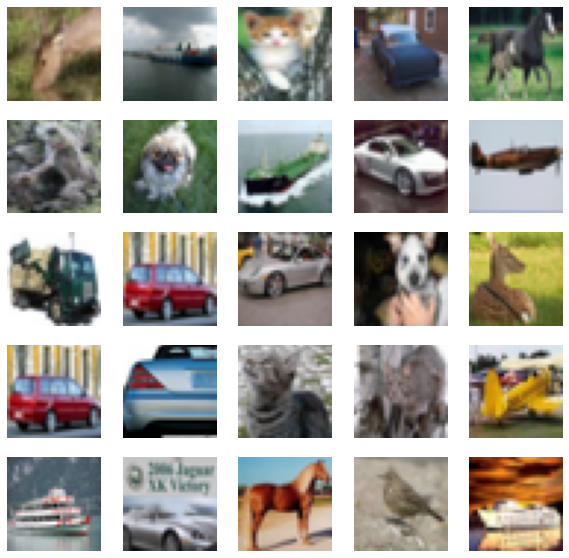

In [ ]:

plt.figure(figsize=(10,10))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    img=X_train[i]
    plt.imshow(img)
    plt.axis('off')

In [ ]:
y_train.ndim

2

# Building The Model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
#Convulutional Layer
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

In [ ]:
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

In [ ]:
#Hidden Layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(10,activation='softmax'))

#Compiling
model.compile(loss='categorical_crossentropy',metrics=["accuracy"],optimizer='adam')

# Training the model
model.fit(X_train,Y_train,batch_size=128,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
391/391 [==============================] - 603s 2s/step - loss: 1.5948 - accuracy: 0.4157 - val_loss: 1.1459 - val_accuracy: 0.5888
Epoch 2/20
391/391 [==============================] - 595s 2s/step - loss: 1.1156 - accuracy: 0.6049 - val_loss: 0.9161 - val_accuracy: 0.6806
Epoch 3/20
391/391 [==============================] - 594s 2s/step - loss: 0.9327 - accuracy: 0.6715 - val_loss: 0.8088 - val_accuracy: 0.7199
Epoch 4/20
391/391 [==============================] - 583s 1s/step - loss: 0.8214 - accuracy: 0.7118 - val_loss: 0.7565 - val_accuracy: 0.7400
Epoch 5/20
391/391 [==============================] - 577s 1s/step - loss: 0.7323 - accuracy: 0.7419 - val_loss: 0.7122 - val_accuracy: 0.7559
Epoch 6/20
391/391 [==============================] - 577s 1s/step - loss: 0.6675 - accuracy: 0.7638 - val_loss: 0.7051 - val_accuracy: 0.7593
Epoch 7/20
391/391 [==============================] - 577s 1s/step - loss: 0.6180 - accuracy: 0.7808 - val_loss: 0.7126 - val_accuracy: 0.7524

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                    

# Predicting

In [ ]:
classes = range(0,10)
names=['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck'
     ]
#Make directory of class_labels (zip names and classes)
class_labels = dict(zip(classes,names))

#Generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

#make predictions
prediction = model.predict(batch,verbose=1)

1/1 [==============================] - 0s 73ms/step


In [ ]:
prediction

array([[1.64884023e-06, 1.11350808e-07, 9.51761678e-02, 4.62860242e-03,
        7.90127039e-01, 2.82849129e-02, 1.83499025e-04, 8.15971941e-02,
        3.46678974e-07, 3.64037845e-07],
       [2.60355955e-06, 4.60346001e-07, 7.82791618e-03, 3.25772986e-02,
        3.02633183e-04, 9.53473568e-01, 1.96100422e-03, 3.81307397e-03,
        2.50803569e-05, 1.63554359e-05],
       [7.29309590e-07, 1.20890917e-07, 3.63977451e-05, 1.49272601e-04,
        7.22772211e-06, 2.10770540e-05, 9.99784291e-01, 6.23156893e-07,
        1.30956920e-07, 1.23893784e-07],
       [1.01036317e-08, 1.40313228e-09, 2.94115045e-04, 5.81814170e-01,
        6.81940615e-02, 8.84725130e-04, 3.48811597e-01, 1.01184912e-06,
        5.22965422e-08, 2.10419685e-07],
       [1.80345863e-10, 9.99911547e-01, 2.34912428e-20, 1.23683660e-17,
        8.75299098e-21, 2.54872622e-19, 3.57073886e-16, 2.58205624e-20,
        2.54845851e-08, 8.83751127e-05],
       [1.34023703e-05, 9.99237776e-01, 1.37191881e-11, 1.72455195e-09,
   

In [ ]:
for image in prediction:
    print(np.sum(image))

0.9999999
0.99999994
0.99999994
0.99999994
0.99999994
0.99999994
1.0000001
1.0
1.0


In [ ]:
class_result=np.argmax(prediction,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


# Final Object Detection

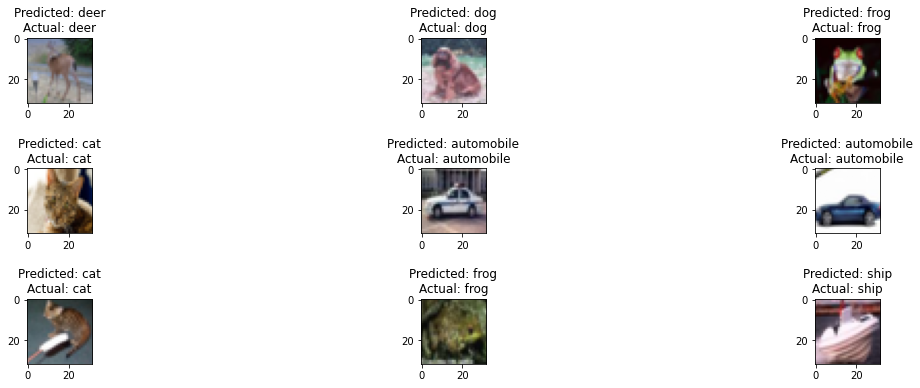

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(20,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='Predicted: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(True)
            axs[i].axes.get_yaxis().set_visible(True)
        #plot the image
        axs[i].imshow(img)
# show the plot
plt.show()